# Minimal OpenSCM-Runner example with FaIR

Requires fair >= 1.6.0a3 and < 2.0.0

In [1]:
import openscm_runner

In [2]:
# NBVAL_IGNORE_OUTPUT
print(openscm_runner.__version__)

0.1.0-alpha.1+13.g511286c.dirty


In [3]:
import pandas as pd
import pyam
import numpy as np
import matplotlib.pyplot as pl

from tqdm import tqdm_notebook

from openscm_runner.run import run
from openscm_runner.adapters import FAIR
from fair.tools.scmdf import scmdf_to_emissions

from fair.forward import fair_scm

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler
/nfs/b0110/Users/mencsm/openscm-runner/src/openscm_runner/run.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
fair=FAIR()

In [5]:
fair.get_version()

'1.6.0a3'

In [6]:
df = pd.read_csv('../data/tiny_example_emissions_harmonized_infilled.csv')
df = pyam.IamDataFrame(df)
df_clean = df.filter(variable="*Infilled*")
df_fair = pyam.IamDataFrame(df_clean.timeseries().reset_index())

In [7]:
x = run(
    climate_models_cfgs={
            "FAIR": [{}],   # passing an empty list of an empty dict will run with defaults
        },
    scenarios=df_fair,
    output_variables=('Surface Temperature','Atmospheric Concentrations|CO2')
)

In [8]:
x = x.timeseries()

In [9]:
x

time                                                             1765-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Surface Temperature            K       0.007050   
                            Atmospheric Concentrations|CO2 ppm   278.051553   
model2 1point5  unspecified Surface Temperature            K       0.007050   
                            Atmospheric Concentrations|CO2 ppm   278.051553   
       2point0  unspecified Surface Temperature            K       0.007050   
                            Atmospheric Concentrations|CO2 ppm   278.051553   

time                                                             1766-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Surface Temperature            K       0.013413   
                            Atmospheric Concentrations|CO2 ppm   278.068543   
model2 1point5  unspecified Surface Temperature            K       0.013413   
                            Atmospheric Concentrations|CO2 ppm   278.068543   
       2point0  unspecified Surface Temperature            K       0.013413   
                            Atmospheric Concentrations|CO2 ppm   278.068543   

time                                                             1767-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Surface Temperature            K       0.020179   
                            Atmospheric Concentrations|CO2 ppm   278.102421   
model2 1point5  unspecified Surface Temperature            K       0.020179   
                            Atmospheric Concentrations|CO2 ppm   278.102421   
       2point0  unspecified Surface Temperature            K       0.020179   
                            Atmospheric Concentrations|CO2 ppm   278.102421   

time                                                             1768-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Surface Temperature            K       0.029607   
                            Atmospheric Concentrations|CO2 ppm   278.135919   
model2 1point5  unspecified Surface Temperature            K       0.029607   
                            Atmospheric Concentrations|CO2 ppm   278.135919   
       2point0  unspecified Surface Temperature            K       0.029607   
                            Atmospheric Concentrations|CO2 ppm   278.135919   

time                                                             1769-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Surface Temperature            K       0.042047   
                            Atmospheric Concentrations|CO2 ppm   278.168881   
model2 1point5  unspecified Surface Temperature            K       0.042047   
                            Atmospheric Concentrations|CO2 ppm   278.168881   
       2point0  unspecified Surface Temperature            K       0.042047   
                            Atmospheric Concentrations|CO2 ppm   278.168881   

time                                                             1770-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Surface Temperature            K       0.055639   
                            Atmospheric Concentrations|CO2 ppm   278.201378   
model2 1point5  unspecified Surface Temperature            K       0.055639   
                            Atmospheric Concentrations|CO2 ppm   278.201378   
       2point0  unspecified Surface Temperature            K       0.055639   
                            Atmospheric Concentrations|CO2 ppm   278.201378   

time                                                             1771-01-01  \
model  scenario region      variable                       unit               
model1 1point5  unspecified Surface Temperat

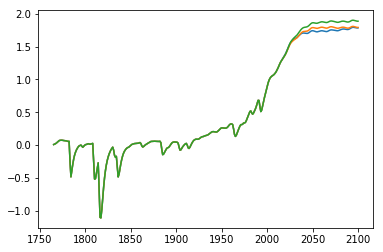

In [10]:
pl.plot(np.arange(1765,2101), x.loc[x.index.get_level_values(3)=='Surface Temperature'].T)

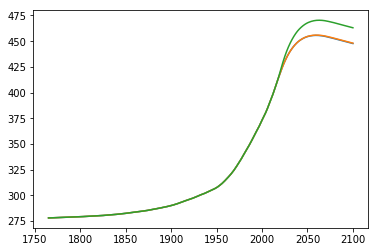

In [11]:
pl.plot(np.arange(1765,2101), x.loc[x.index.get_level_values(3)=='Atmospheric Concentrations|CO2'].T)

In [12]:
#x.to_csv('~/junk.csv')